In [3]:
#%autoreload
from trace_utils import *
from plot_utils import *
from exclude_BCDkr import *

In [4]:
#LOAD TRACES
work_dir = '/Users/robinhood/O2_outputs/imgproc/traces/BCD_kr'
traces_list = []
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.npy']
for file in file_list:
    filename = os.path.join(work_dir, file)
    traces = load_traces(filename)
    traces_list.append(traces)

In [5]:
#FORMAT DATASTRUCTURE
all_traces = format_trace_datastructure(traces_list, exclude_BCDkr)

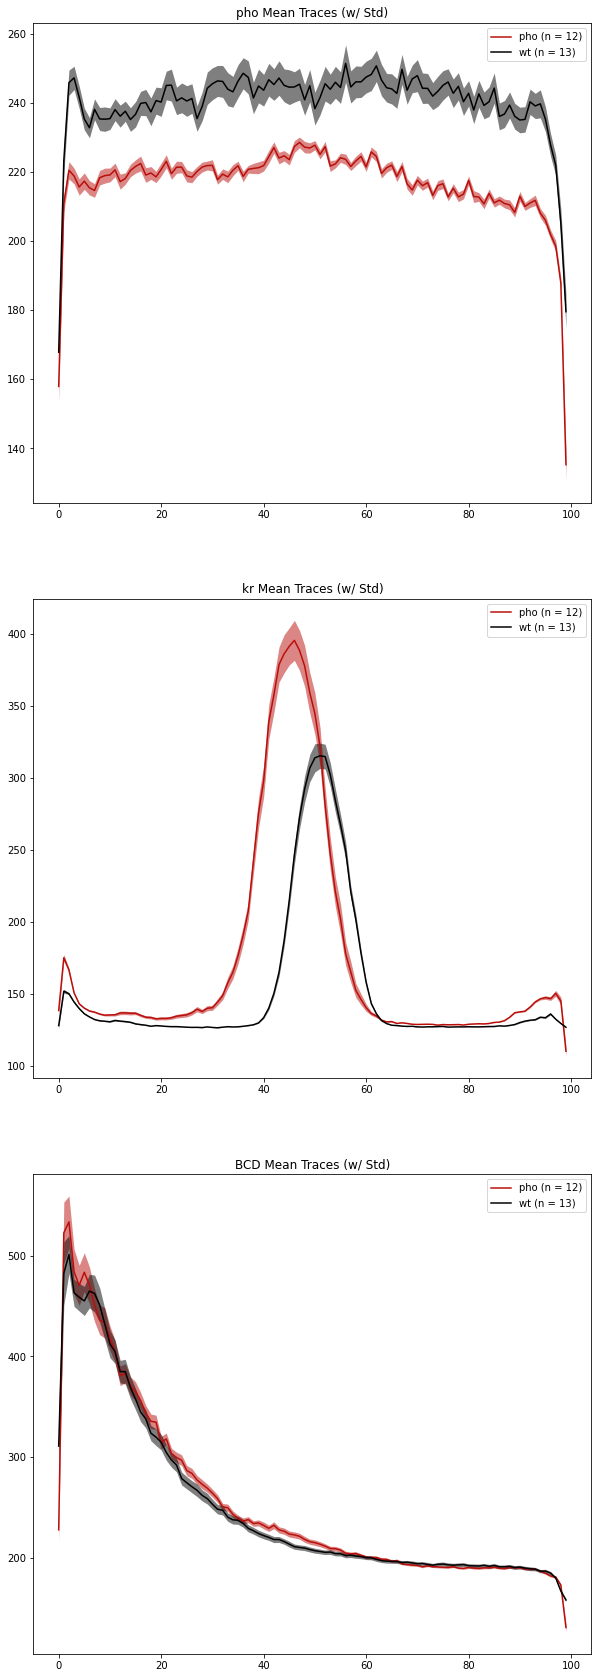

In [6]:
#PLOT
fig = show_all_traces(all_traces)
#plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_all.svg", format="svg" )

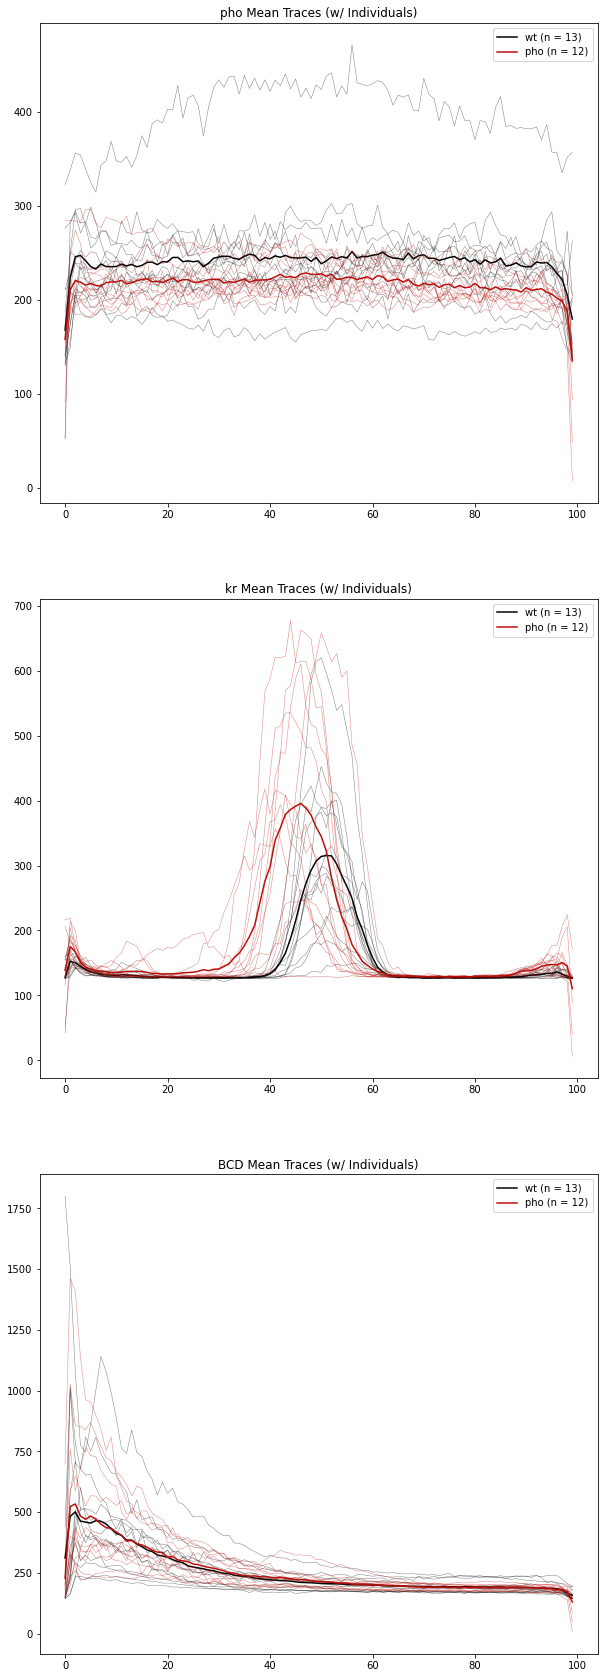

In [7]:
#can list which genes/genotypes you want plotted, or omit/set to None to do all, and optionally display individual traces
fig = show_all_traces(all_traces, genotypes=['wt', 'pho'], genes=None, individuals=True) 

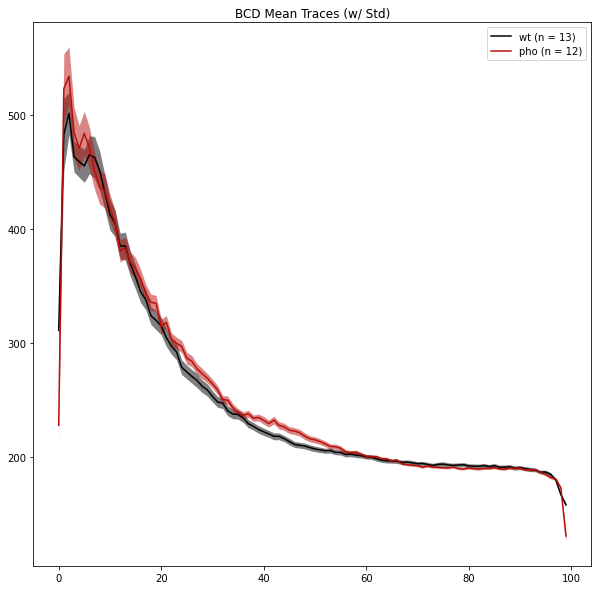

In [8]:
fig = show_all_traces(all_traces, genotypes=['wt', 'pho'], genes=['BCD']) 

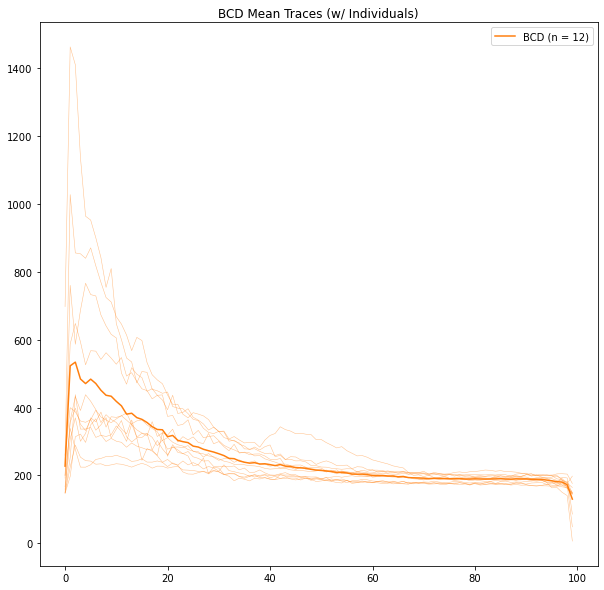

In [9]:
#Plotting all of the genes for a single genotype:
fig = show_genotype_traces(all_traces, 'pho', genes = ['hb', 'BCD'], individuals=True)

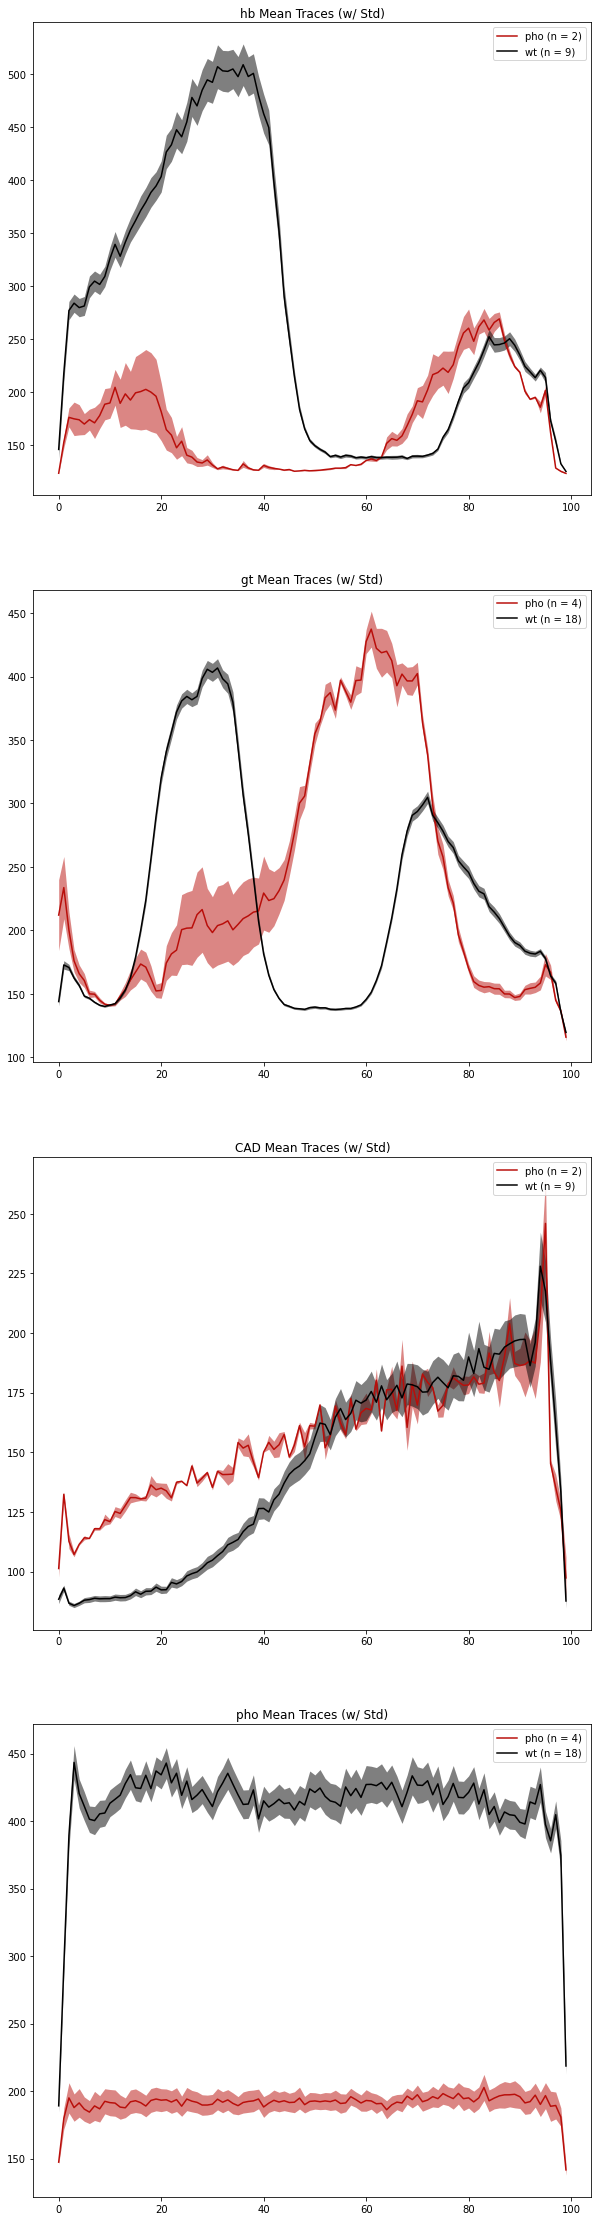

In [6]:
#one stripe of giant only
from xtreme import *

#LOAD TRACES
work_dir = '/Users/robinhood/O2_outputs/imgproc/traces/xtreme_gt'
traces_list = []
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.npy']
for file in file_list:
    filename = os.path.join(work_dir, file)
    traces = load_traces(filename)
    traces_list.append(traces)

all_traces = format_trace_datastructure(traces_list, xtreme)

fig = show_all_traces(all_traces) 


In [ ]:
from excluded_14 import *
stage_excluded
excluded = excluded_14+stage_excluded
excluded

In [57]:
from trace_utils import *
from excluded_14 import *

#LOAD TRACES
work_dir = '/Users/robinhood/O2_outputs/imgproc/traces'
traces_list = []
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.npy']
for file in file_list:
    filename = os.path.join(work_dir, file)
    traces = load_traces(filename)
    traces_list.append(traces)

all_traces = format_trace_datastructure(traces_list, excluded_14)
fig = show_all_traces(all_traces, genotypes=['wt'], genes='hb', 'BCD', 'kr', 'gt')
# plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/traces_pcs.svg", format="svg" )
# plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_nc14.svg", format="svg" )

SyntaxError: positional argument follows keyword argument (3142988889.py, line 14)

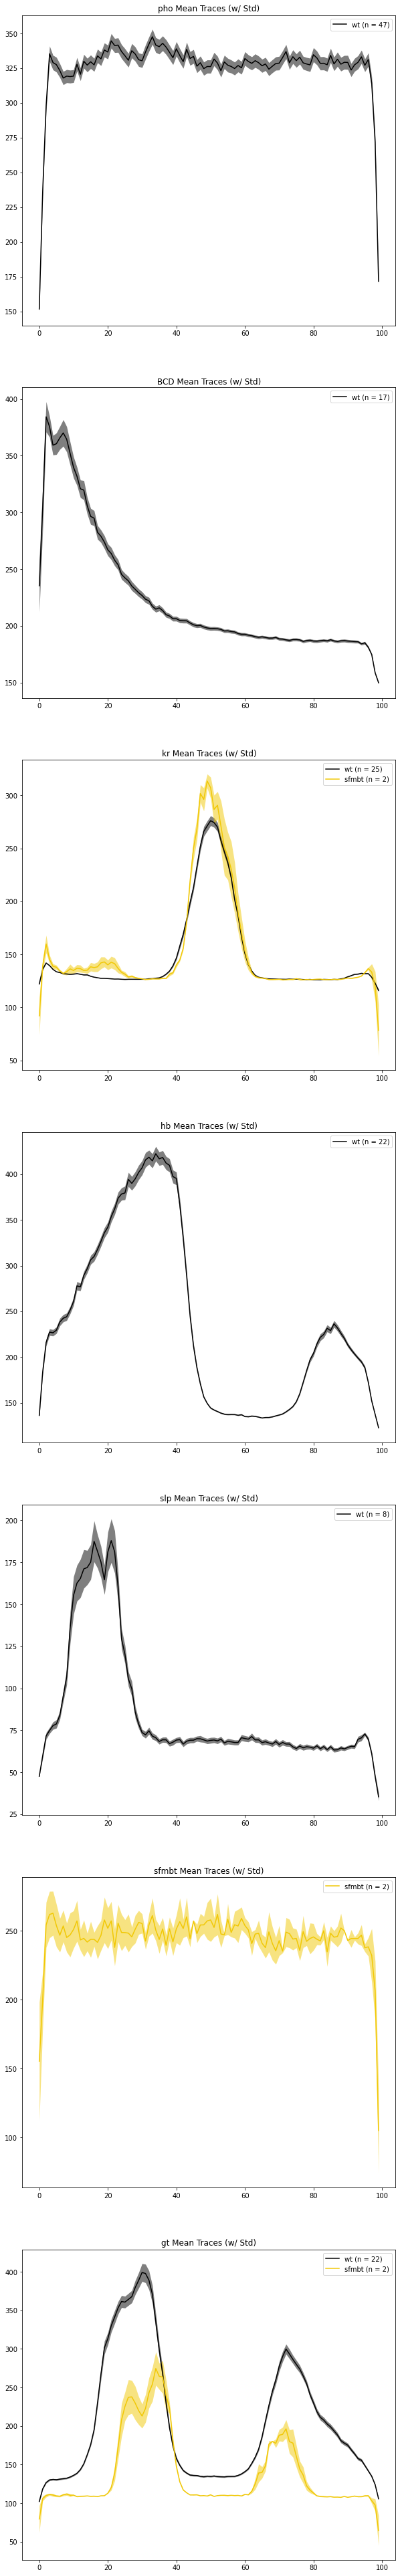

In [56]:
genotypes = list(all_traces.keys())
color_dict = get_color_dict(genotypes)
fig = show_all_traces(all_traces, color_dict=color_dict, genotypes=['wt', 'sfmbt'])
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/traces_sfmbt.svg", format="svg" )

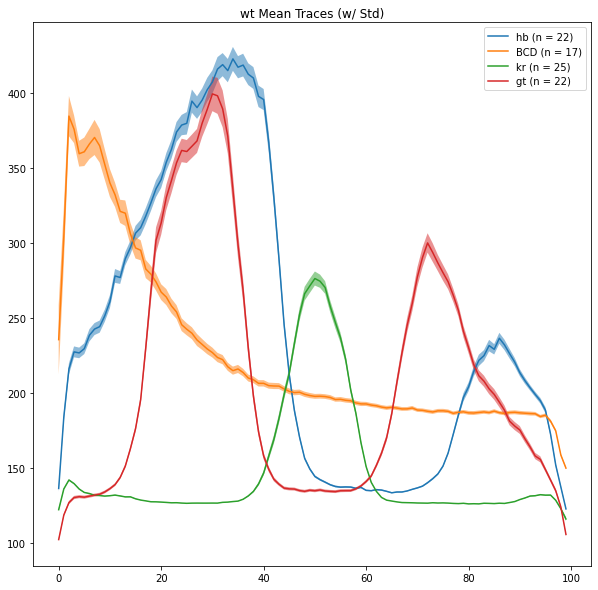

In [67]:
genotype = 'wt'
# genes = list(all_traces[genotype].keys())
genes = ['hb', 'BCD', 'kr', 'gt']
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for gene in genes:
    if gene not in all_traces[genotype].keys():
        continue
    traces = all_traces[genotype][gene]
    mean_traces = np.nanmean(traces, 1)
    n = mean_traces.shape[0]
    mean = np.nanmean(mean_traces, 0)
    error = np.nanstd(mean_traces, 0) / mean_traces.shape[0]
    ax.fill_between(np.arange(mean.shape[0]), mean-error, mean+error, alpha=0.5, linewidth=0)#, color=color_dict[genotype])
    ax.plot(mean, label=f'{gene} (n = {n})')#, color=color_dict[genotype])
    ax.set_title(f'{genotype} Mean Traces (w/ Std)')
    ax.legend()

    plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/traces_wtall.svg", format="svg" )

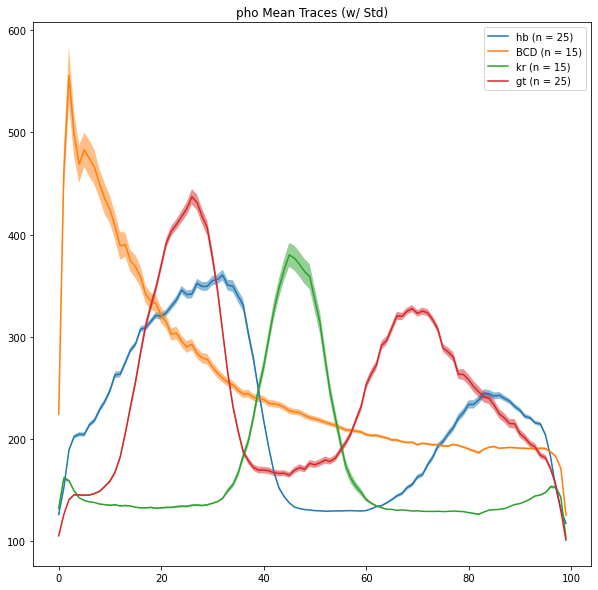

In [65]:
genotype = 'pho'
# genes = list(all_traces[genotype].keys())
genes = ['hb', 'BCD', 'kr', 'gt']
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for gene in genes:
    if gene not in all_traces[genotype].keys():
        continue
    traces = all_traces[genotype][gene]
    mean_traces = np.nanmean(traces, 1)
    n = mean_traces.shape[0]
    mean = np.nanmean(mean_traces, 0)
    error = np.nanstd(mean_traces, 0) / mean_traces.shape[0]
    ax.fill_between(np.arange(mean.shape[0]), mean-error, mean+error, alpha=0.5, linewidth=0)#, color=color_dict[genotype])
    ax.plot(mean, label=f'{gene} (n = {n})')#, color=color_dict[genotype])
    ax.set_title(f'{genotype} Mean Traces (w/ Std)')
    ax.legend()

    plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/traces_phoall.svg", format="svg" )